In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [157]:
df_train_5000eps = pd.read_csv("train_5000eps.csv")
df_train_10000eps_all = pd.read_csv("train_10000eps.csv")
df_train_10000eps_discriminative_all = pd.read_csv("train_10000eps_discriminative.csv")
df_train_10000eps_discriminative_all.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,...,flag,loss,epsilon,model_id,ewm_reward,ewm_wins,ewm_reward_001,ewm_wins_001,ewm_reward_01,ewm_wins_01
0,2024-05-30 18:12:21.296,game_episodes,13,102,1,102,598.0,675,33.750000,380,...,False,3.855238,0.999661,C1-ext-ni,598.000000,0.0,598.000000,0.0,598.000000,0.0
1,2024-05-30 18:12:48.288,game_episodes,13,1135,2,1033,637.0,898,4.359223,194,...,False,0.513779,0.995642,C1-ext-ni,617.500975,0.0,617.509755,0.0,617.597990,0.0
2,2024-05-30 18:13:23.794,game_episodes,13,2499,3,1364,799.0,1127,4.143382,128,...,False,0.187238,0.990359,C1-ext-ni,678.006700,0.0,678.067040,0.0,678.674051,0.0
3,2024-05-30 18:13:52.484,game_episodes,13,3572,4,1073,856.0,1126,5.261682,186,...,False,0.785768,0.986223,C1-ext-ni,722.511701,0.0,722.617061,0.0,723.676080,0.0
4,2024-05-30 18:14:20.814,game_episodes,13,4624,5,1052,1406.0,1672,7.961905,190,...,False,0.593463,0.982185,C1-ext-ni,859.236703,0.0,859.567275,0.0,862.897589,0.0


In [158]:
# clean up model_ids
df_train_5000eps.loc[df_train_5000eps["model_id"] == "baseline_original", "model_id"] = 'B1'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "baseline_B2", "model_id"] = 'B2'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "target_T2", "model_id"] = 'T2_i'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "P1_compact", "model_id"] = 'P1_ni'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "C1", "model_id"] = 'C1_i'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "T1", "model_id"] = 'T1_ni'


In [159]:
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "B1-long", "model_id"] = 'B1'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "B2-long", "model_id"] = 'B2'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "P1", "model_id"] = 'P1_ni'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "T1-ni", "model_id"] = 'T1_ni'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "C1-ni", "model_id"] = 'C1_ni'

In [160]:
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "B1-long", "model_id"] = 'B1'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "B2-long", "model_id"] = 'B2'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "C1-ext-ni", "model_id"] = 'C1_ext_ni'

In [161]:
# drop the rows from B1 and B2 with episodes > 10000. These will return later
df_train_10000eps = df_train_10000eps_all[df_train_10000eps_all['episode'] <= 10000]
df_train_10000eps_discriminative = df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['episode'] <= 10000]

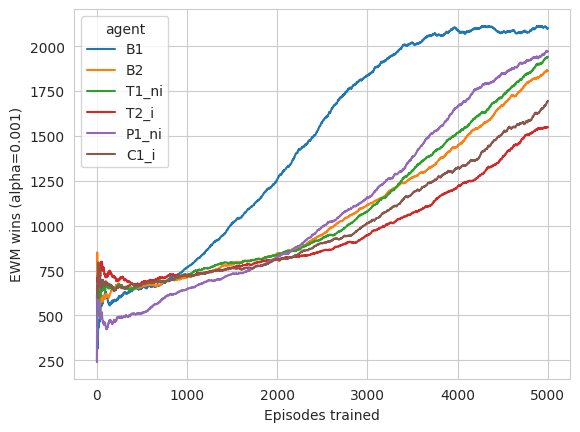

In [162]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_i', 'P1_ni', 'C1_i']
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_rewards_5K.png")

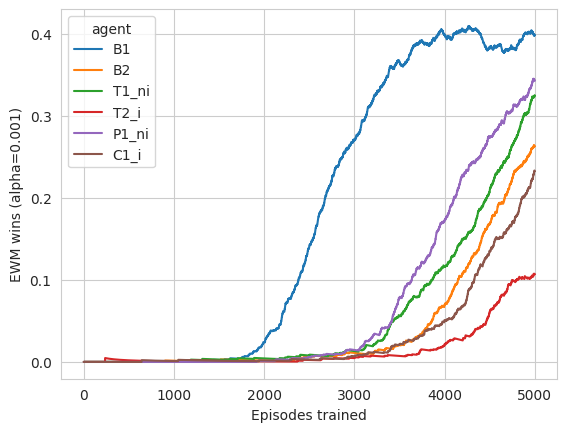

In [164]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_i', 'P1_ni', 'C1_i']
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_5K.png")

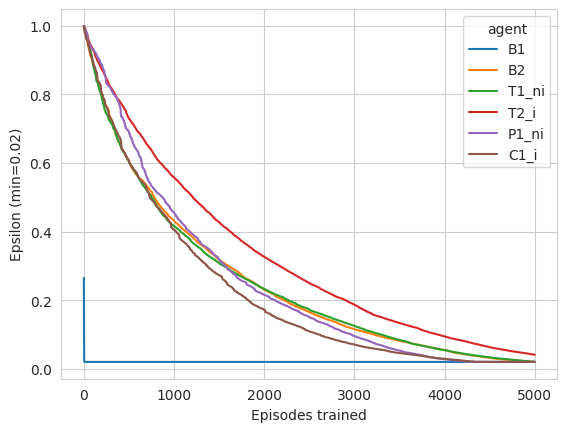

In [165]:
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_i', 'P1_ni', 'C1_i']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_5K.png")

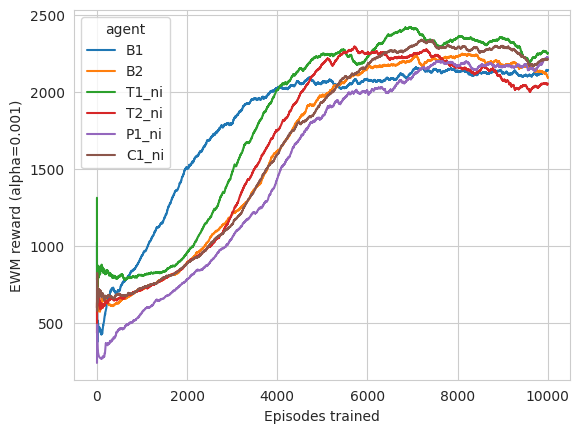

In [166]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_ni', 'P1_ni', 'C1_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_rewards_10K.png")

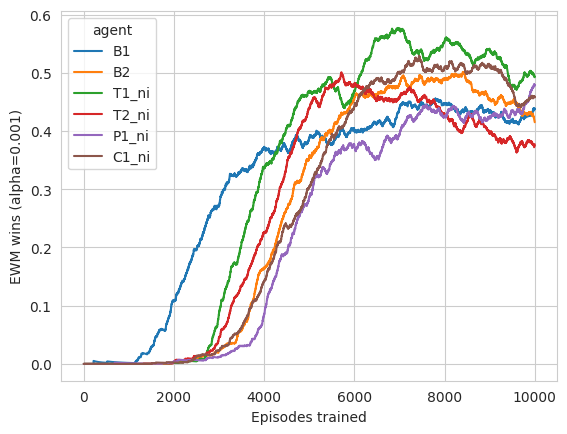

In [167]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_ni', 'P1_ni', 'C1_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_10K.png")

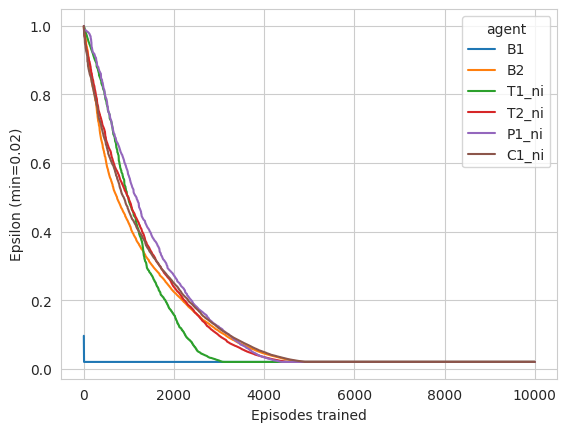

In [168]:
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_ni', 'P1_ni', 'C1_ni']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_10K.png")

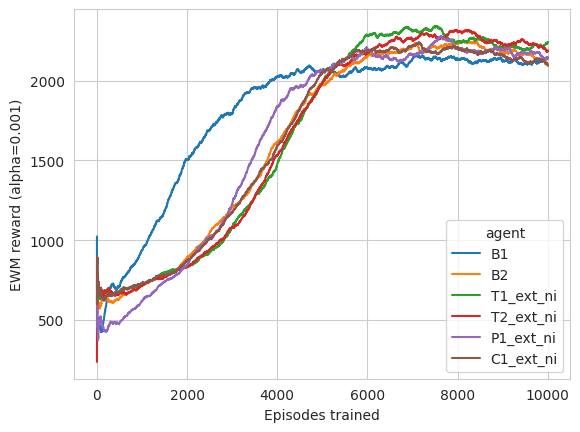

In [169]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni', 'T2_ext_ni', 'P1_ext_ni', 'C1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_rewards_10K_ext.png")

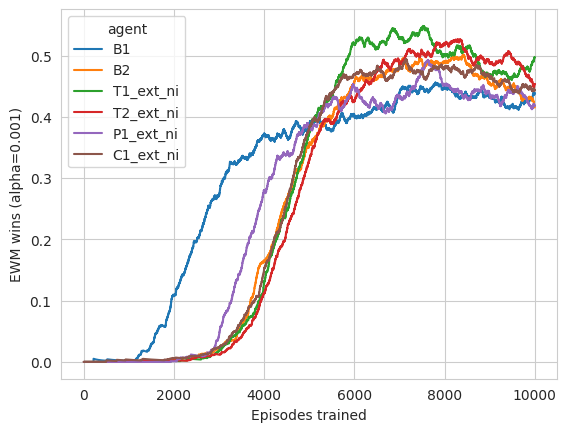

In [170]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni', 'T2_ext_ni', 'P1_ext_ni', 'C1_ext_ni']             
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_10K_ext.png")

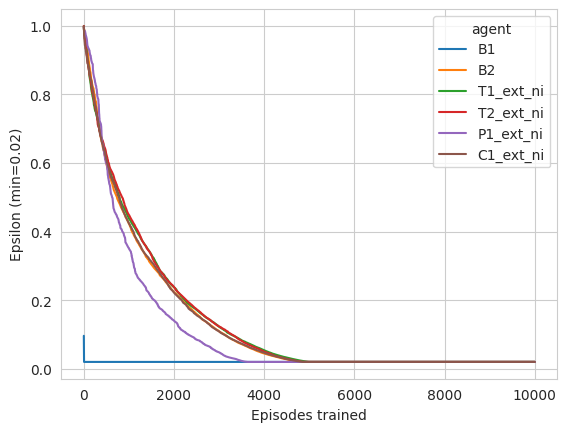

In [171]:
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni', 'T2_ext_ni', 'P1_ext_ni', 'C1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_10K_ext.png")

In [172]:
# take the full length of B1 and B2 and compare to T1_ni, T1_ext_ni, T2_ni and C1_ni
concatenated_winners = pd.concat([
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'B1'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'B2'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'B2-42'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'T1_ni'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'T2_ni'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'P1_ni'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'C1_ni'], 
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'T1_ext_ni'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'T2_ext_ni'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'P1_ext_ni'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'C1_ext_ni']
])

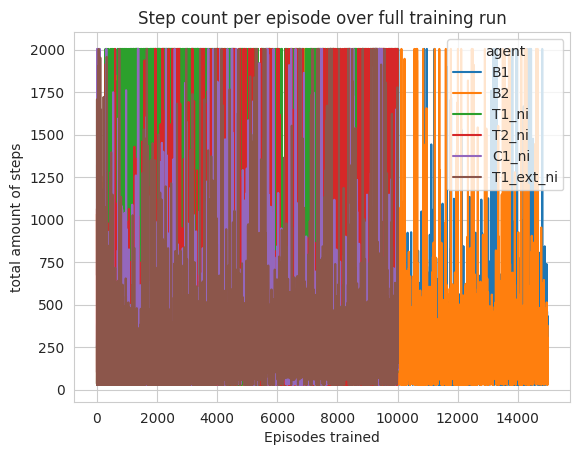

In [173]:
# plot the individual step count per episode per agent, to illustrate the step-episode thing
sns.lineplot(x='episode', 
             y='episode_steps', 
             data=concatenated_winners, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_ni', 'C1_ni', 'T1_ext_ni']
             ).set(title="Step count per episode over full training run", xlabel="Episodes trained", ylabel="total amount of steps")
plt.legend(title='agent')

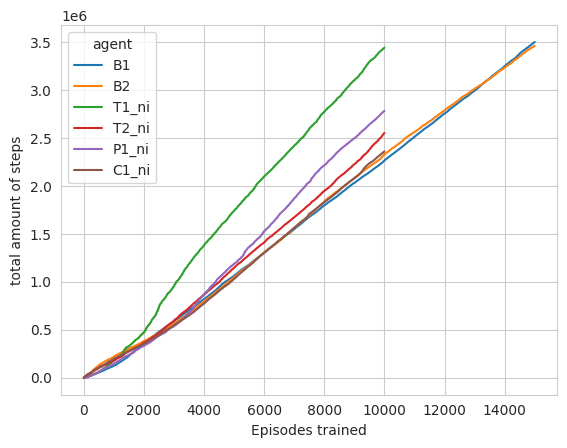

In [174]:
# plot the cumulative step count per episode per agent, to illustrate the step-episode thing
sns.lineplot(x='episode', 
             y='total_steps', 
             data=concatenated_winners, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni', 'T2_ni', 'P1_ni', 'C1_ni']
             ).set(xlabel="Episodes trained", ylabel="total amount of steps")
plt.legend(title='agent')
plt.savefig("./training_winners_cumulative_steps.png")

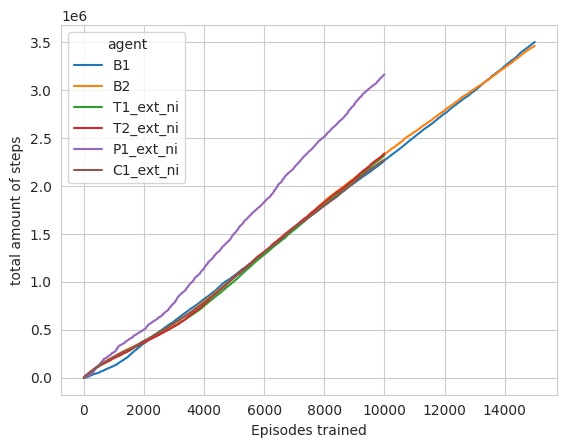

In [175]:
# plot the cumulative step count per episode per agent, to illustrate the step-episode thing
sns.lineplot(x='episode', 
             y='total_steps', 
             data=concatenated_winners, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni', 'T2_ext_ni', 'P1_ext_ni', 'C1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="total amount of steps")
plt.legend(title='agent')
plt.savefig("./training_winners_cumulative_steps_ext.png")

In [176]:
# find out what the final step count for each agent was
final_step_count = concatenated_winners.groupby(['model_id'], as_index=False)['total_steps'].max()
final_step_count.head(15)

,model_id,total_steps
0,B1,3500765
1,B2,3459373
2,B2-42,3503898
3,C1_ext_ni,2274553
4,C1_ni,2360013
5,P1_ext_ni,3160920
6,P1_ni,2781993
7,T1_ext_ni,2320863
8,T1_ni,3441229
9,T2_ext_ni,2338741


In [177]:
# now compare the winner individually with the baselines capped to the same amount of steps
concatenated_winners_T1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 3441229]
concatenated_winners_T2_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2552335]
concatenated_winners_P1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2781993]
concatenated_winners_C1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2360013]
concatenated_winners_T1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2320863]
concatenated_winners_T2_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2338741]
concatenated_winners_P1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 3160920]
concatenated_winners_C1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2274553]

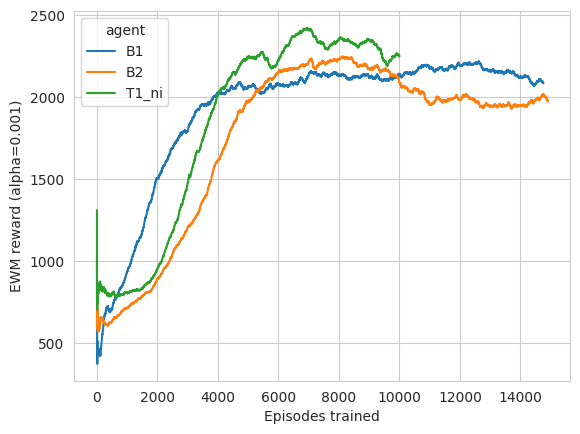

In [178]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_T1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T1_ni.png")

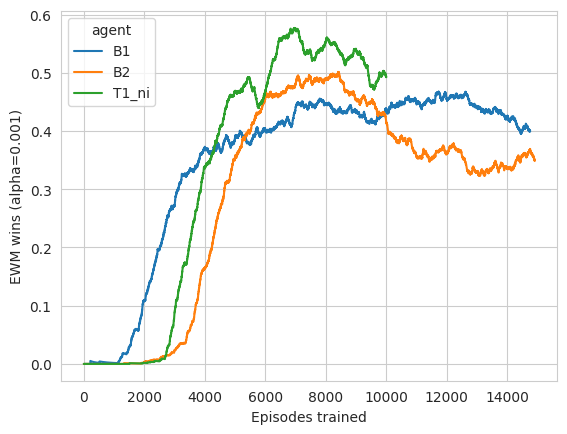

In [179]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_T1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T1_ni.png")

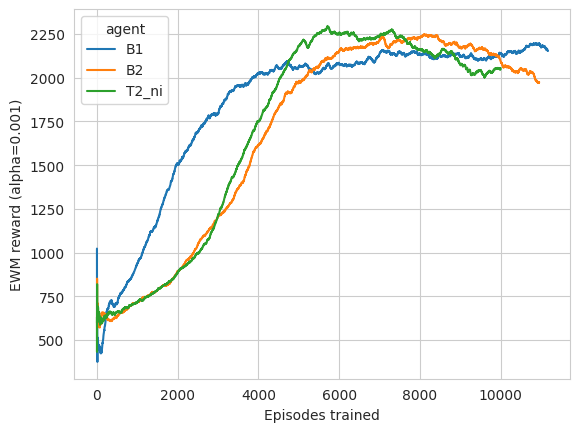

In [180]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_T2_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T2_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T2_ni.png")

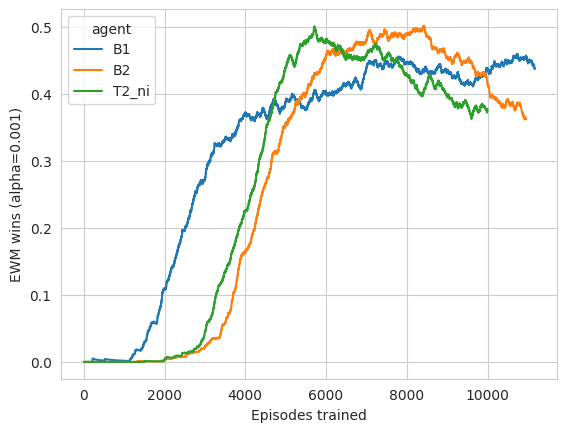

In [181]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_T2_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T2_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T2_ni.png")

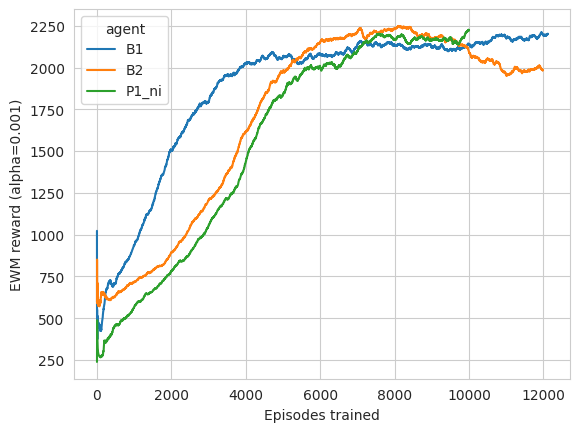

In [182]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_P1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'P1_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_P1_ni.png")

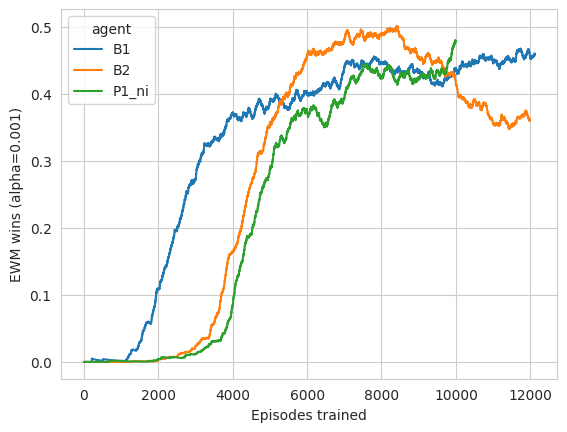

In [183]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_P1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'P1_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_P1_ni.png")

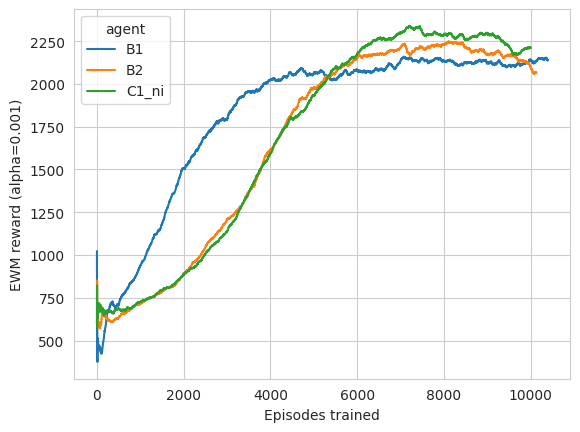

In [184]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_C1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'C1_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_C1_ni.png")

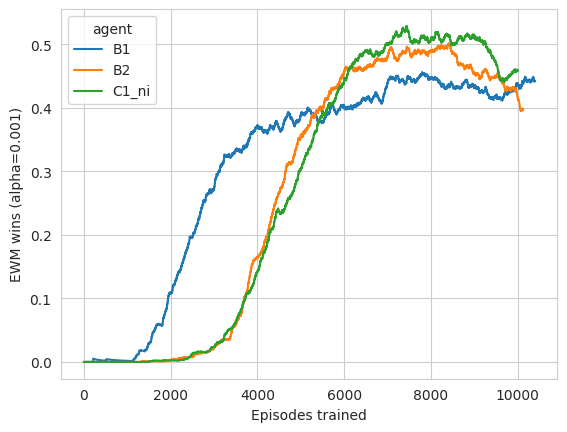

In [185]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_C1_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'C1_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_C1_ni.png")

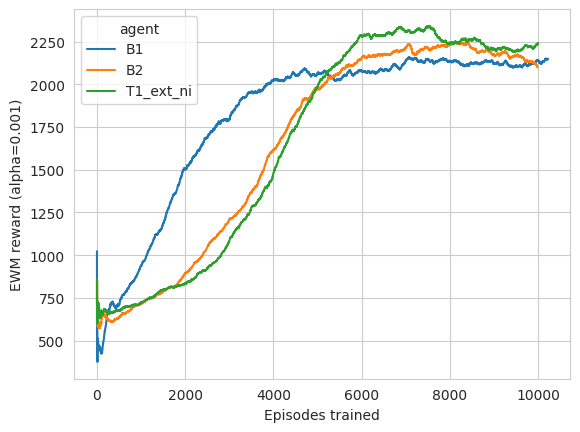

In [186]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_T1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T1_ext_ni.png")

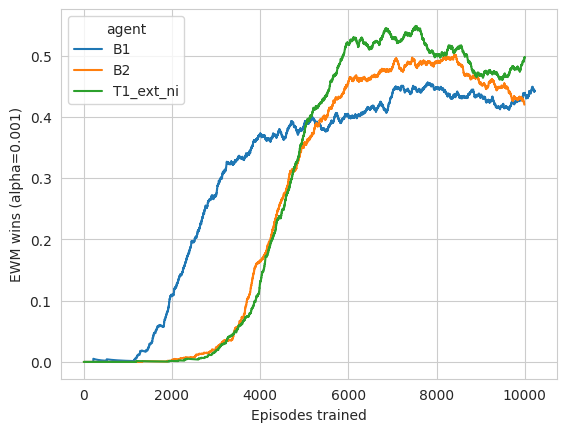

In [187]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_T1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T1_ext_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T1_ext_ni.png")

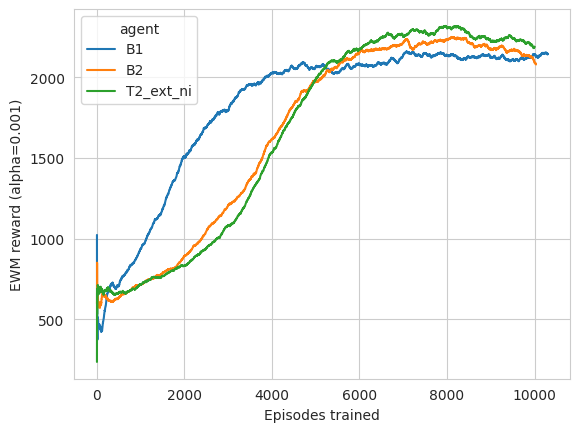

In [188]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_T2_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T2_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T2_ext_ni.png")

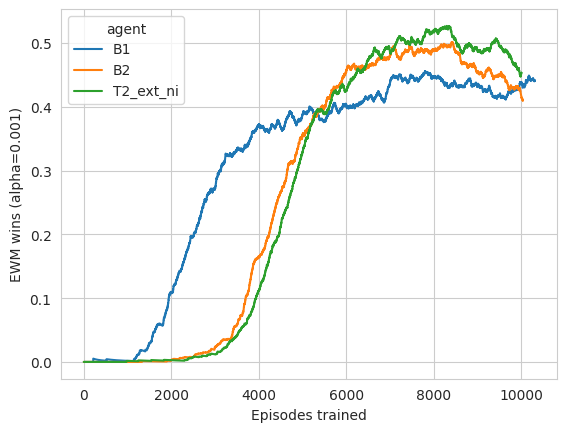

In [189]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_T2_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'T2_ext_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T2_ext_ni.png")

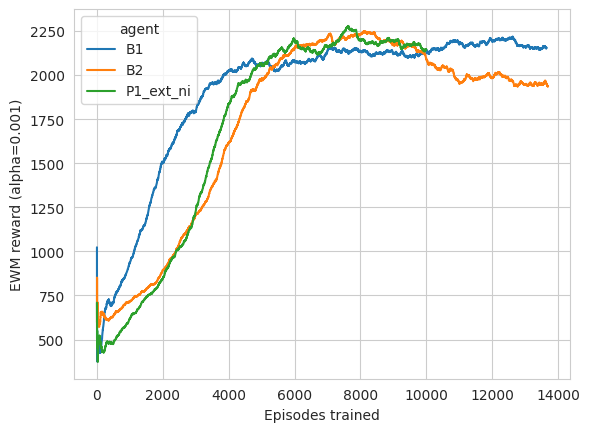

In [190]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_P1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'P1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_P1_ext_ni.png")

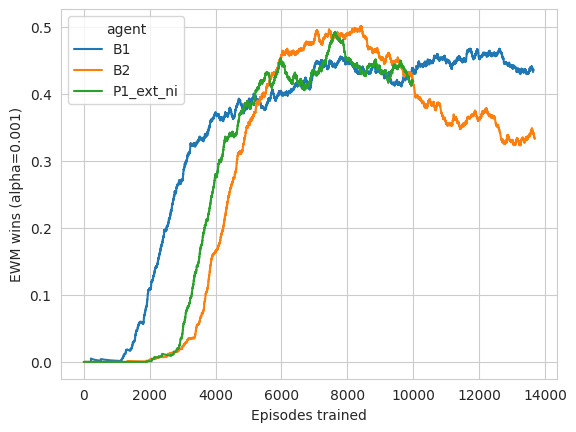

In [191]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_P1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'P1_ext_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_P1_ext_ni.png")

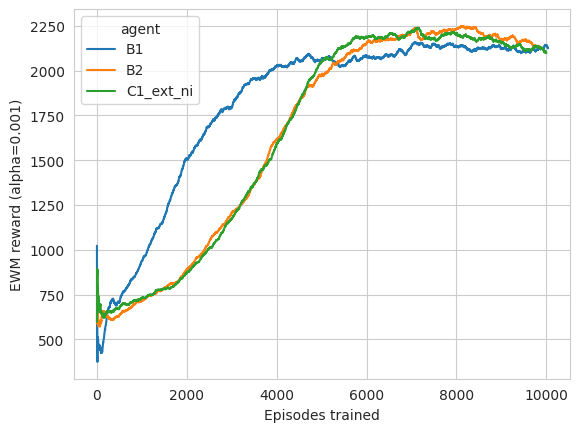

In [192]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=concatenated_winners_C1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'C1_ext_ni']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_C1_ext_ni.png")

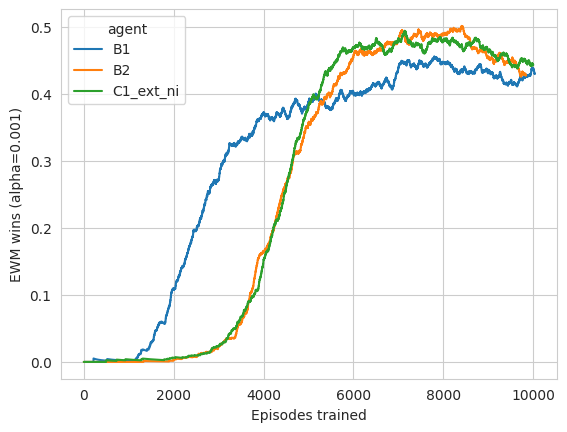

In [193]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=concatenated_winners_C1_ext_ni, 
             hue='model_id',
             hue_order=['B1', 'B2', 'C1_ext_ni']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_C1_ext_ni.png")